In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csvpath_trial = "Resources/clinicaltrial_data.csv"
csvpath_mouse = "Resources/mouse_drug_data.csv"
trial_data = pd.read_csv(csvpath_trial)
mouse_data = pd.read_csv(csvpath_mouse)
merged_data = pd.merge(trial_data,mouse_data, on=('Mouse ID'), how='left')
color = ['Blue','Green','Red','Black']

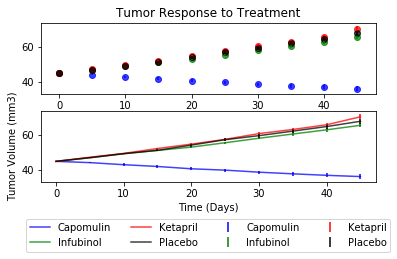

In [3]:
#The instructions said plot scatter but example shows line. So I plotted both and intentionally printed a legend for both just for clarity purposes
group_time_drug = merged_data.groupby(['Drug','Timepoint'])
group_time_drug_avg = round(group_time_drug['Tumor Volume (mm3)'].mean(),2)
group_time_drug_avg = group_time_drug_avg.loc[['Capomulin','Infubinol','Ketapril','Placebo'],:]
group_time_drug_avg_ri = group_time_drug_avg.reset_index()

#pivot data for better representation
group_time_drug_avg_ri2 = group_time_drug_avg_ri.pivot(index= 'Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# get list of column names into a list
column_names = list(group_time_drug_avg_ri2.columns.values)

#Caluculate SEM of the same data and bring to the same format as above dataframe
group_time_drug_sem = merged_data.groupby(['Drug','Timepoint']).sem()
group_time_drug_sem = group_time_drug_sem['Tumor Volume (mm3)']
group_time_drug_sem = group_time_drug_sem.reset_index()
group_time_drug_sem = group_time_drug_sem.pivot(index= 'Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# create a sub plot to grid and give its size, starting position of current graph and its row and column span
graph1 = plt.subplot2grid((15,3), (0,0), rowspan=5, colspan=3 )
x = 0
# for each column in dataframe, print one scatter plot graph and overlay that with an error bar plot to show the deviation
for i in column_names:
    graph1.scatter(group_time_drug_avg_ri2.index.values,group_time_drug_avg_ri2[i], color=color[x],label=i, alpha=0.75)
    graph1.errorbar(group_time_drug_avg_ri2.index.values, group_time_drug_avg_ri2[i], yerr=group_time_drug_sem[i] ,color=color[x], fmt='none')
    x += 1
# Reset the values for x and i so it can be reused
x = 0
plt.title("Tumor Response to Treatment")
# create a sub plot to grid and give its size, starting position of current graph and its row and column span
graph2 = plt.subplot2grid((15,3), (6,0), rowspan=5, colspan=3)
# for each column in dataframe, print one line plot graph and overlay that with an error bar plot to show the deviation
for i in column_names:
    graph2.plot(group_time_drug_avg_ri2.index.values,group_time_drug_avg_ri2[i], color=color[x],label=i, alpha=0.75)
    graph2.errorbar(group_time_drug_avg_ri2.index.values, group_time_drug_avg_ri2[i], yerr=group_time_drug_sem[i] ,color=color[x], fmt='none')
    x += 1
x = 0
# print the legend for graph 2 and provide the column span and how its attached to the main graph
graph2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.45),  shadow=False, ncol=4)
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
#plt.ylim(min(group_time_drug_avg_ri2.min())-10,max(group_time_drug_avg_ri2.max()+20))
#plt.xlim(group_time_drug_avg_ri2.index.min()-5,group_time_drug_avg_ri2.index.max()+5)
plt.show()

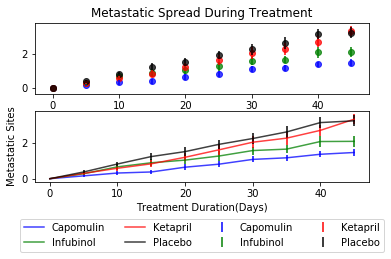

In [4]:
#The instructions said plot scatter but example shows line. So I plotted both and intentionally printed a legend for both just for clarity purposes
group_time_drug = merged_data.groupby(['Drug','Timepoint'])
group_time_drug_sites_avg = round(group_time_drug['Metastatic Sites'].mean(),2)
group_time_drug_sites_avg = group_time_drug_sites_avg.loc[['Capomulin','Infubinol','Ketapril','Placebo'],:]
group_time_drug_sites_avg_ri = group_time_drug_sites_avg.reset_index()
group_time_drug_sites_avg_ri2 = group_time_drug_sites_avg_ri.pivot(index= 'Timepoint', columns='Drug', values='Metastatic Sites')
columns = list(group_time_drug_sites_avg_ri2.columns.values)
#Caluculate SEM of the same data and bring to the same format as above dataframe
group_time_drug_sem2 = merged_data.groupby(['Drug','Timepoint']).sem()
group_time_drug_sem2 = group_time_drug_sem2['Metastatic Sites']
group_time_drug_sem2 = group_time_drug_sem2.reset_index()
group_time_drug_sem2 = group_time_drug_sem2.pivot(index= 'Timepoint', columns='Drug', values='Metastatic Sites')

graph1 = plt.subplot2grid((15,3), (0,0), rowspan=5, colspan=3 )
x = 0
for i in columns:
    graph1.scatter(group_time_drug_sites_avg_ri2.index.values, group_time_drug_sites_avg_ri2[i], color=color[x], label=i, alpha=0.75)
    graph1.errorbar(group_time_drug_sites_avg_ri2.index.values, group_time_drug_sites_avg_ri2[i], yerr=group_time_drug_sem2[i] ,color=color[x], fmt='none')
    x+=1
x = 0
plt.title("Metastatic Spread During Treatment")
graph2 = plt.subplot2grid((15,3), (6,0), rowspan=5, colspan=3)
for i in columns:
    graph2.plot(group_time_drug_sites_avg_ri2.index.values, group_time_drug_sites_avg_ri2[i], color=color[x], label=i, alpha=0.75)
    graph2.errorbar(group_time_drug_sites_avg_ri2.index.values, group_time_drug_sites_avg_ri2[i], yerr=group_time_drug_sem2[i] ,color=color[x], fmt='none')  
    x += 1
x = 0
graph2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.45),  shadow=False, ncol=4)
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Metastatic Sites")
plt.show()

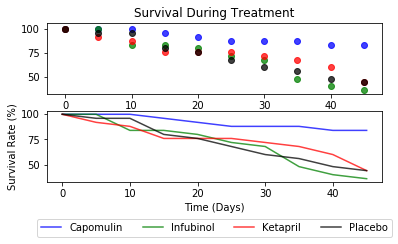

In [8]:
#The instructions said plot scatter but example shows line. So I plotted both
group_time_drug = merged_data.groupby(['Drug','Timepoint'])
group_time_drug_mouse = group_time_drug['Mouse ID'].count()
group_time_drug_mouse = group_time_drug_mouse.loc[['Capomulin','Infubinol','Ketapril','Placebo'],:]
group_time_drug_mouse_ri = group_time_drug_mouse.reset_index()
group_time_drug_mouse_ri2 = group_time_drug_mouse_ri.pivot(index= 'Timepoint', columns='Drug', values='Mouse ID')
column_names = list(group_time_drug_mouse_ri2.columns.values)

for i in column_names:
    group_time_drug_mouse_ri2[i]=round((group_time_drug_mouse_ri2[i]/group_time_drug_mouse_ri2[i].max())*100,2)
graph1 = plt.subplot2grid((15,3), (0,0), rowspan=5, colspan=3 )
x=0
for i in column_names:
    graph1.scatter(group_time_drug_mouse_ri2.index.values, group_time_drug_mouse_ri2[i], color=color[x],label=i, alpha=0.75)
    x+=1
x=0
plt.title("Survival During Treatment")
graph2 = plt.subplot2grid((15,3), (6,0), rowspan=5, colspan=3 )
for i in column_names:
    graph2.plot(group_time_drug_mouse_ri2.index.values, group_time_drug_mouse_ri2[i], color=color[x],label=i, alpha=0.75)
    x+=1
x=0
graph2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.45),  shadow=False, ncol=4)
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.show()

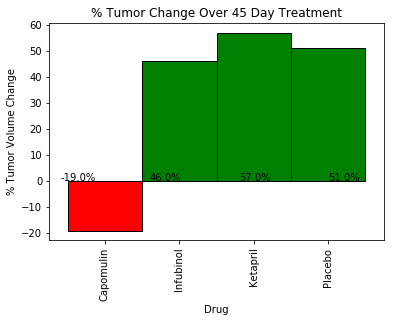

In [6]:
group_time_drug = merged_data.groupby(['Drug','Timepoint'])
#calcualte mean
group_time_drug_tumor_avg = group_time_drug['Tumor Volume (mm3)'].mean()
group_time_drug_tumor_avg = group_time_drug_tumor_avg.loc[['Capomulin','Infubinol','Ketapril','Placebo'],:]
group_time_drug_mouse_ri = group_time_drug_tumor_avg.reset_index()
#pivot data for better representation
group_time_drug_mouse_ri2 = group_time_drug_mouse_ri.pivot(index= 'Timepoint', columns='Drug', values='Tumor Volume (mm3)')
#calculate percentage change only for the 10th row i.e. 9 of the dictitonary as it starts from 0 and round to 6 decimal points
group_time_drug_mouse_ri3 = round(group_time_drug_mouse_ri2.pct_change(periods=9),6)
# multiply the DF by 100 to get % equivalent of the df
group_time_drug_mouse_ri3 = round(group_time_drug_mouse_ri3.multiply(100),0)
# drop rows that have all values as null / nan
group_time_drug_mouse_ri3 = group_time_drug_mouse_ri3.dropna(axis='index', how='all')
#reset index to get the timepoint as a column
group_time_drug_mouse_ri3 = group_time_drug_mouse_ri3.reset_index()
# drop timepoint column
group_time_drug_mouse_ri3 = group_time_drug_mouse_ri3.drop(columns=['Timepoint'])
# Transpose the data
group_time_drug_mouse_ri3 = group_time_drug_mouse_ri3.transpose()
# plot the bar graph with width 1 to make sure they are stacked and condition to ensure red or green clor and edge color of blank without a legend
ax = group_time_drug_mouse_ri3.plot(kind='bar', label='Test', width=1.0, color=[np.where(group_time_drug_mouse_ri3[0]>=0, 'g', 'r')], edgecolor='k', legend=False)
plt.title('% Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
# for each value in the graph, annoate the value of height of that graph instance and
# the x position is xvalue *1.200 and y postiion is 0 or height*1.005 so it prints at the top or bottom of the graph
for p in ax.patches:
     ax.annotate(str(p.get_height())+'%', (p.get_x() * 1.200,0))
plt.show()

In [9]:
#Observable trends based on the data
#     - The tumor volume increases for most drugs over time with the only exception for mice treated with Capomulin
#     - The tumor volume increases for mice treated with drugs Infubinol' or 'Ketapril' have a very similar growth as mice treated with a 'Placebo'
#     - The number of Metastatics sites increases for all drugs over time. The Metastatic sites increases for the drug 'Ketapril' very closely matches that  of the 'Placebo' drug while treating with 'Capomulin' or 'Infubinol' had better results
#     - The survival rate reduces for all drugs over time. Mice being treated with Capomulin seem to have a much higher survival rate compared to mice treated with all other drugs (including 'placebo')
#     - Mice treated with Capomulin saw a decrease in the tumor volume whereas mice treated with all other drugs (including 'placebo') saw an increase in the tumor volume